# Deep Latent Policy Gradient for Ant

In [1]:
import tensorflow as tf
from antTrainEnv_class import antTrainEnv_dlpg_class
from util import gpu_sess
print ("TF version is [%s]."%(tf.__version__))

Instructions for updating:
Use the retry module or similar alternatives.
TF version is [1.7.0].


### Tuning parameters

In [2]:
headingCoef = 1e-4 # Heading penalty 
tMax = 3
nAnchor = 20
entRegCoef = 1e-2
nIter4update = 1e2
maxEpoch  = 1000
batchSize = 100
nPrevConsider = 10
nPrevBestQ2Add = 50
name = 'ant_dlpg_headingCoef%.0e_tMax%d_nAnchor%d_entReg%.0e_nIter4update%d_batchSize%d'%\
    (headingCoef,tMax,nAnchor,entRegCoef,nIter4update,batchSize)
print ("Name:[%s]"%(name))

Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100]


### Instantiate Class

Text name: results/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100.txt
Custom Ant Environment made by SJ.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/sungjoon/github/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


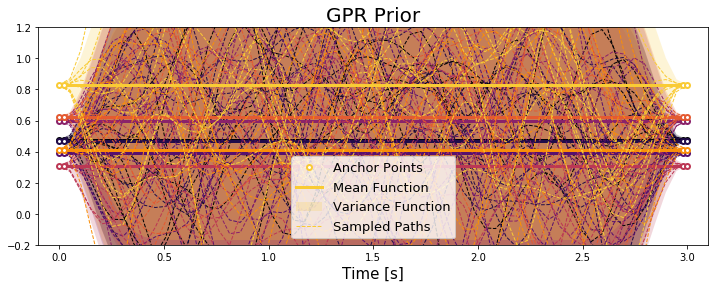

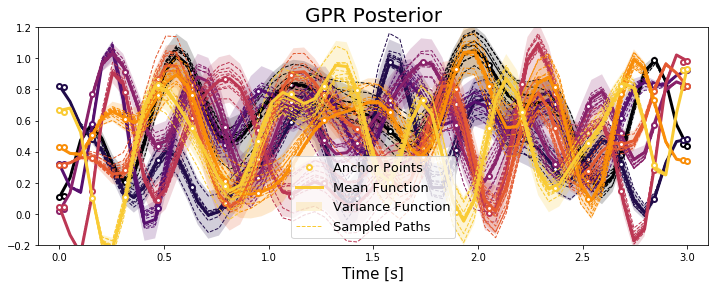

==== Global Variables ====
 [00] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/enc_lin0/weights:0] Shape:[[160, 128]]
 [01] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/enc_lin0/biases:0] Shape:[[128]]
 [02] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/enc_lin1/weights:0] Shape:[[128, 128]]
 [03] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/enc_lin1/biases:0] Shape:[[128]]
 [04] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/zMuEncoded/weights:0] Shape:[[128, 16]]
 [05] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/zMuEncoded/biases:0] Shape:[[16]]
 [06] Name:[ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/zLogVarEncoded/weights:0] Shape:[[128, 16]]
 [07] Name:[ant_dlpg_headingCoef1e-04_tMax3_nA

In [3]:
tf.reset_default_graph() # Reset Graph
AntEnv = antTrainEnv_dlpg_class(_name=name,_headingCoef=headingCoef,
                                _tMax=tMax,_nAnchor=nAnchor,_maxRepeat=3,
                                _hypGainPrior=1/2,_hypLenPrior=1/4,
                                _hypGainPost=1/2,_hypLenPost=1/2,
                                _levBtw=0.9,_pGain=0.01,
                                _zDim=16,_hDims=[128,128],_vaeActv=tf.nn.tanh,_vaeOutActv=None,_vaeQactv=tf.nn.tanh,
                                _entRegCoef=entRegCoef,
                                _PLOT_GRP=True,_SAVE_TXT=True)

### Train Ant

Start training...
[0000/100][0.0%] Loss: 16.28(recon:14.62+kl:1.15+l2:0.00+ent:0.51)
[0010/100][10.0%] Loss: 12.05(recon:10.91+kl:0.75+l2:0.00+ent:0.39)
[0020/100][20.0%] Loss: 9.95(recon:8.99+kl:0.60+l2:0.00+ent:0.36)
[0030/100][30.0%] Loss: 10.71(recon:9.61+kl:0.70+l2:0.00+ent:0.40)
[0040/100][40.0%] Loss: 11.78(recon:10.62+kl:0.80+l2:0.00+ent:0.36)
[0050/100][50.0%] Loss: 10.41(recon:9.31+kl:0.74+l2:0.00+ent:0.36)
[0060/100][60.0%] Loss: 10.34(recon:8.96+kl:0.98+l2:0.00+ent:0.39)
[0070/100][70.0%] Loss: 10.60(recon:9.28+kl:0.94+l2:0.00+ent:0.37)
[0080/100][80.0%] Loss: 8.34(recon:7.23+kl:0.70+l2:0.00+ent:0.41)
[0090/100][90.0%] Loss: 9.35(recon:8.06+kl:0.89+l2:0.00+ent:0.39)
[0099/100][99.0%] Loss: 8.98(recon:7.79+kl:0.78+l2:0.00+ent:0.41)
[0/1000](#total:100) avgQ:[-307.173] XdispMean:[-0.228] XdispVar:[2.888] absHdispMean:[81.2] priorProb:[0.90]
 rSum:[-307.173] = (contact:-0.201+ctrl:-345.837+fwd:-9.833+heading:-112.572+survive:161.270) [rSumMax:-11.152]
[Stat] Q:[-41.010] xDispM

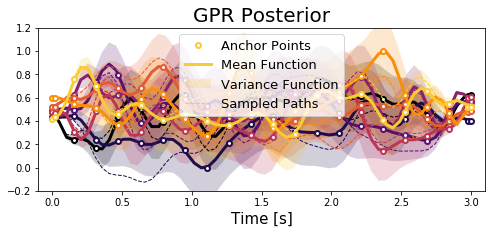

    [GRP-0] sumRwd:-41.641=cntct:-0.26+ctrl:-110.06+fwd:-83.61+hd:-27.71+srv:180.00) xD:[-4.038] hD:[25.7]


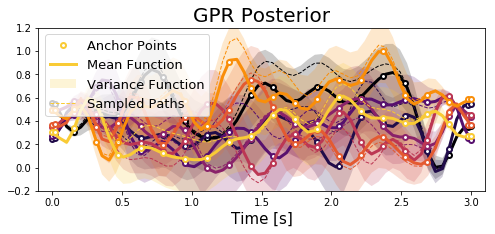

    [GRP-1] sumRwd:-158.337=cntct:-0.19+ctrl:-139.74+fwd:-42.41+hd:-156.00+srv:180.00) xD:[-1.626] hD:[-144.1]


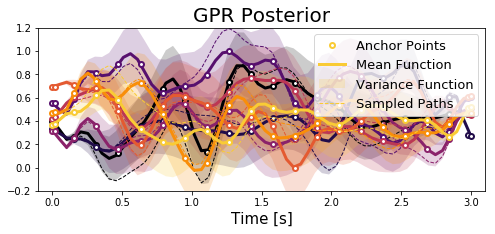

    [GRP-2] sumRwd:-162.668=cntct:-0.38+ctrl:-81.82+fwd:-30.84+hd:-229.63+srv:180.00) xD:[-1.376] hD:[-168.8]


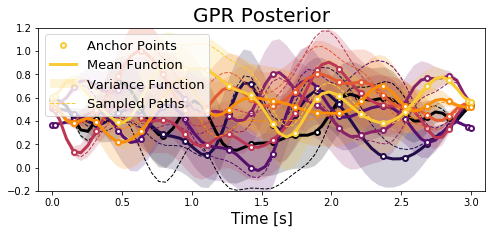

    [GRP-3] sumRwd:117.062=cntct:-0.30+ctrl:-64.15+fwd:12.66+hd:-11.14+srv:180.00) xD:[0.653] hD:[-18.8]


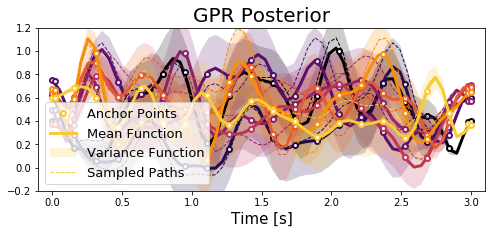

    [GRP-4] sumRwd:-118.087=cntct:-0.07+ctrl:-84.31+fwd:-20.56+hd:-77.15+srv:64.00) xD:[-1.028] hD:[126.5]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0000.npz] Saved. Size is [1.4330]MB
[0000/100][0.0%] Loss: 8.42(recon:7.30+kl:0.68+l2:0.00+ent:0.43)
[0010/100][10.0%] Loss: 5.87(recon:5.04+kl:0.42+l2:0.00+ent:0.40)
[0020/100][20.0%] Loss: 5.29(recon:4.68+kl:0.18+l2:0.00+ent:0.42)
[0030/100][30.0%] Loss: 6.28(recon:5.58+kl:0.24+l2:0.00+ent:0.47)
[0040/100][40.0%] Loss: 5.67(recon:5.01+kl:0.15+l2:0.00+ent:0.51)
[0050/100][50.0%] Loss: 4.98(recon:4.35+kl:0.10+l2:0.00+ent:0.52)
[0060/100][60.0%] Loss: 5.78(recon:5.18+kl:0.08+l2:0.00+ent:0.51)
[0070/100][70.0%] Loss: 5.17(recon:4.60+kl:0.04+l2:0.00+ent:0.53)
[0080/100][80.0%] Loss: 5.37(recon:4.72+kl:0.11+l2:0.00+ent:0.55)
[0090/100][90.0%] Loss: 5.06(recon:4.52+kl:-0.02+l2:0.00+ent:0.56)
[0099/100][99.0%] Loss: 5.27(recon:4.72+kl:-0.03+l2:0.00+ent:0.57)
[1/1000](#total:200) avgQ:[

[Stat] Q:[13.219] xDispMean:[-0.860] hSqMean:[16274.2]
[0000/100][0.0%] Loss: 3.32(recon:2.81+kl:-0.24+l2:0.00+ent:0.76)
[0010/100][10.0%] Loss: 3.52(recon:2.88+kl:-0.22+l2:0.00+ent:0.86)
[0020/100][20.0%] Loss: 3.18(recon:2.62+kl:-0.31+l2:0.00+ent:0.86)
[0030/100][30.0%] Loss: 3.14(recon:2.62+kl:-0.33+l2:0.00+ent:0.85)
[0040/100][40.0%] Loss: 2.54(recon:2.08+kl:-0.39+l2:0.00+ent:0.85)
[0050/100][50.0%] Loss: 2.60(recon:2.10+kl:-0.36+l2:0.00+ent:0.85)
[0060/100][60.0%] Loss: 2.88(recon:2.33+kl:-0.31+l2:0.00+ent:0.85)
[0070/100][70.0%] Loss: 3.09(recon:2.52+kl:-0.28+l2:0.00+ent:0.85)
[0080/100][80.0%] Loss: 2.74(recon:2.26+kl:-0.37+l2:0.00+ent:0.85)
[0090/100][90.0%] Loss: 3.05(recon:2.49+kl:-0.31+l2:0.00+ent:0.86)
[0099/100][99.0%] Loss: 2.50(recon:2.07+kl:-0.43+l2:0.00+ent:0.85)
[9/1000](#total:1000) avgQ:[-300.608] XdispMean:[0.006] XdispVar:[2.732] absHdispMean:[96.3] priorProb:[0.90]
 rSum:[-300.608] = (contact:-0.241+ctrl:-330.908+fwd:-5.751+heading:-135.608+survive:171.900) [rSum

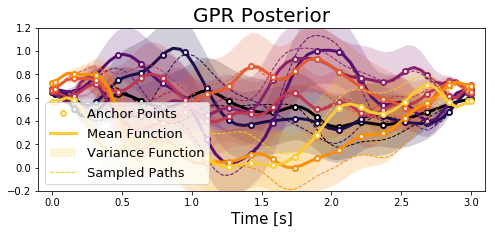

    [GRP-0] sumRwd:118.407=cntct:-0.43+ctrl:-48.48+fwd:-9.45+hd:-3.24+srv:180.00) xD:[-0.386] hD:[21.8]


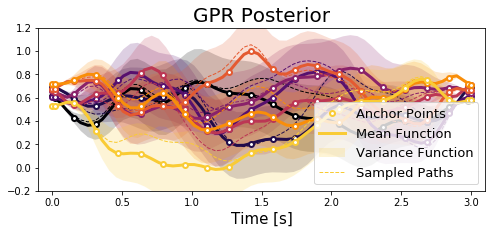

    [GRP-1] sumRwd:68.083=cntct:-0.44+ctrl:-23.95+fwd:-28.09+hd:-59.42+srv:180.00) xD:[-1.405] hD:[-86.3]


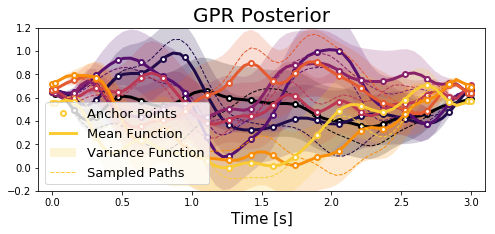

    [GRP-2] sumRwd:113.216=cntct:-0.44+ctrl:-42.86+fwd:-7.56+hd:-15.93+srv:180.00) xD:[-0.367] hD:[52.0]


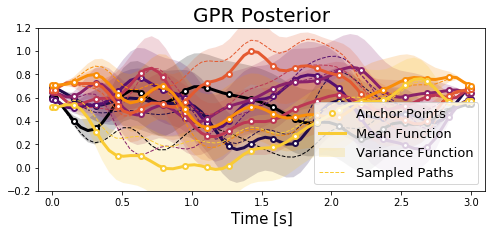

    [GRP-3] sumRwd:136.843=cntct:-0.48+ctrl:-21.08+fwd:-12.45+hd:-9.15+srv:180.00) xD:[-0.622] hD:[-35.2]


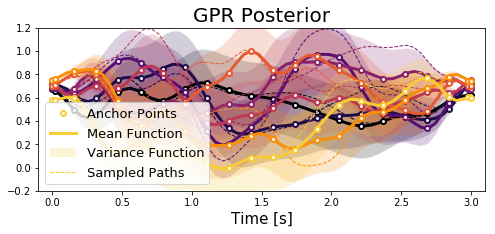

    [GRP-4] sumRwd:53.783=cntct:-0.44+ctrl:-28.65+fwd:-16.43+hd:-80.70+srv:180.00) xD:[-0.785] hD:[-96.2]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0010.npz] Saved. Size is [1.4346]MB
[0000/100][0.0%] Loss: 3.26(recon:2.55+kl:-0.16+l2:0.00+ent:0.86)
[0010/100][10.0%] Loss: 2.21(recon:1.72+kl:-0.36+l2:0.00+ent:0.86)
[0020/100][20.0%] Loss: 2.56(recon:2.12+kl:-0.40+l2:0.00+ent:0.84)
[0030/100][30.0%] Loss: 2.65(recon:2.28+kl:-0.48+l2:0.00+ent:0.85)
[0040/100][40.0%] Loss: 1.91(recon:1.57+kl:-0.51+l2:0.00+ent:0.85)
[0050/100][50.0%] Loss: 2.40(recon:2.01+kl:-0.46+l2:0.00+ent:0.85)
[0060/100][60.0%] Loss: 2.41(recon:2.00+kl:-0.44+l2:0.00+ent:0.85)
[0070/100][70.0%] Loss: 2.34(recon:1.94+kl:-0.44+l2:0.00+ent:0.85)
[0080/100][80.0%] Loss: 2.42(recon:2.03+kl:-0.47+l2:0.00+ent:0.85)
[0090/100][90.0%] Loss: 2.37(recon:1.97+kl:-0.45+l2:0.00+ent:0.85)
[0099/100][99.0%] Loss: 2.59(recon:2.16+kl:-0.43+l2:0.00+ent:0.85)
[11/1000](#total:12

[Stat] Q:[155.849] xDispMean:[0.237] hSqMean:[193.6]
[0000/100][0.0%] Loss: 3.26(recon:2.51+kl:-0.25+l2:0.00+ent:1.00)
[0010/100][10.0%] Loss: 3.53(recon:2.91+kl:-0.31+l2:0.00+ent:0.93)
[0020/100][20.0%] Loss: 2.33(recon:1.90+kl:-0.51+l2:0.00+ent:0.93)
[0030/100][30.0%] Loss: 2.56(recon:2.13+kl:-0.51+l2:0.00+ent:0.94)
[0040/100][40.0%] Loss: 2.44(recon:2.03+kl:-0.53+l2:0.00+ent:0.94)
[0050/100][50.0%] Loss: 2.82(recon:2.37+kl:-0.50+l2:0.00+ent:0.94)
[0060/100][60.0%] Loss: 3.13(recon:2.72+kl:-0.53+l2:0.00+ent:0.93)
[0070/100][70.0%] Loss: 2.86(recon:2.41+kl:-0.49+l2:0.00+ent:0.94)
[0080/100][80.0%] Loss: 2.43(recon:2.03+kl:-0.54+l2:0.00+ent:0.94)
[0090/100][90.0%] Loss: 2.64(recon:2.24+kl:-0.54+l2:0.00+ent:0.94)
[0099/100][99.0%] Loss: 2.59(recon:2.19+kl:-0.55+l2:0.00+ent:0.94)
[19/1000](#total:2000) avgQ:[-251.516] XdispMean:[0.006] XdispVar:[2.297] absHdispMean:[94.9] priorProb:[0.90]
 rSum:[-251.516] = (contact:-0.245+ctrl:-305.387+fwd:-4.238+heading:-105.407+survive:163.760) [rSumM

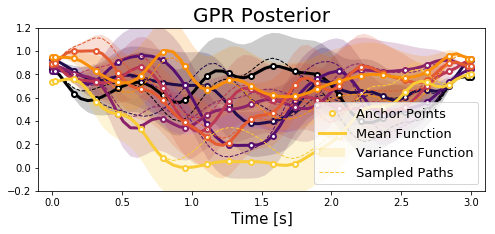

    [GRP-0] sumRwd:109.979=cntct:-0.47+ctrl:-36.49+fwd:13.04+hd:-46.10+srv:180.00) xD:[0.652] hD:[89.2]


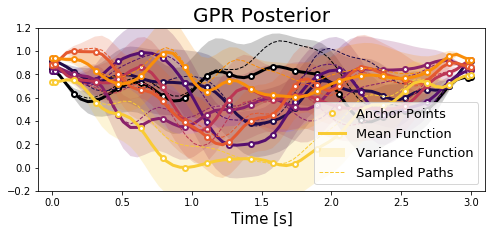

    [GRP-1] sumRwd:109.739=cntct:-0.53+ctrl:-35.69+fwd:5.70+hd:-39.75+srv:180.00) xD:[0.285] hD:[80.8]


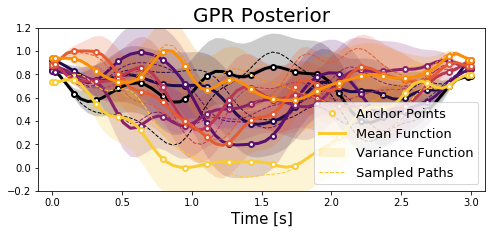

    [GRP-2] sumRwd:155.666=cntct:-0.54+ctrl:-35.70+fwd:14.76+hd:-2.86+srv:180.00) xD:[0.738] hD:[1.8]


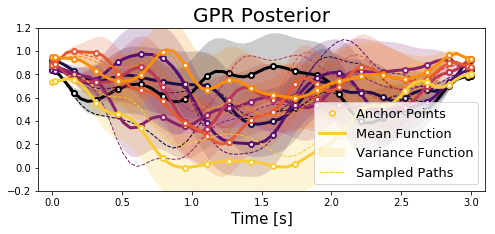

    [GRP-3] sumRwd:140.571=cntct:-0.52+ctrl:-36.70+fwd:21.93+hd:-24.14+srv:180.00) xD:[1.097] hD:[67.1]


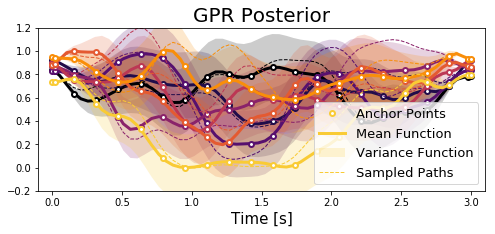

    [GRP-4] sumRwd:139.001=cntct:-0.51+ctrl:-36.33+fwd:20.52+hd:-24.69+srv:180.00) xD:[1.028] hD:[67.3]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0020.npz] Saved. Size is [1.4320]MB
[0000/100][0.0%] Loss: 2.76(recon:2.06+kl:-0.30+l2:0.00+ent:1.00)
[0010/100][10.0%] Loss: 3.01(recon:2.41+kl:-0.39+l2:0.00+ent:0.98)
[0020/100][20.0%] Loss: 2.51(recon:2.00+kl:-0.48+l2:0.00+ent:0.99)
[0030/100][30.0%] Loss: 2.48(recon:2.02+kl:-0.54+l2:0.00+ent:1.00)
[0040/100][40.0%] Loss: 2.53(recon:2.05+kl:-0.53+l2:0.00+ent:1.00)
[0050/100][50.0%] Loss: 2.67(recon:2.19+kl:-0.52+l2:0.00+ent:0.99)
[0060/100][60.0%] Loss: 2.62(recon:2.13+kl:-0.52+l2:0.00+ent:1.00)
[0070/100][70.0%] Loss: 2.41(recon:1.98+kl:-0.57+l2:0.00+ent:1.00)
[0080/100][80.0%] Loss: 1.98(recon:1.58+kl:-0.60+l2:0.00+ent:1.00)
[0090/100][90.0%] Loss: 2.17(recon:1.77+kl:-0.60+l2:0.00+ent:0.99)
[0099/100][99.0%] Loss: 2.77(recon:2.29+kl:-0.52+l2:0.00+ent:1.00)
[21/1000](#total:2200

[Stat] Q:[145.794] xDispMean:[0.977] hSqMean:[259.7]
[0000/100][0.0%] Loss: 3.84(recon:3.20+kl:-0.25+l2:0.00+ent:0.88)
[0010/100][10.0%] Loss: 3.86(recon:3.36+kl:-0.38+l2:0.00+ent:0.88)
[0020/100][20.0%] Loss: 2.72(recon:2.35+kl:-0.51+l2:0.00+ent:0.88)
[0030/100][30.0%] Loss: 3.11(recon:2.77+kl:-0.54+l2:0.00+ent:0.88)
[0040/100][40.0%] Loss: 2.74(recon:2.41+kl:-0.54+l2:0.00+ent:0.87)
[0050/100][50.0%] Loss: 2.76(recon:2.46+kl:-0.57+l2:0.00+ent:0.87)
[0060/100][60.0%] Loss: 3.39(recon:2.99+kl:-0.48+l2:0.00+ent:0.88)
[0070/100][70.0%] Loss: 3.35(recon:2.98+kl:-0.51+l2:0.00+ent:0.87)
[0080/100][80.0%] Loss: 2.95(recon:2.57+kl:-0.50+l2:0.00+ent:0.88)
[0090/100][90.0%] Loss: 2.80(recon:2.48+kl:-0.55+l2:0.00+ent:0.88)
[0099/100][99.0%] Loss: 2.71(recon:2.38+kl:-0.55+l2:0.00+ent:0.88)
[29/1000](#total:3000) avgQ:[-297.368] XdispMean:[0.113] XdispVar:[1.838] absHdispMean:[87.6] priorProb:[0.89]
 rSum:[-297.368] = (contact:-0.228+ctrl:-325.375+fwd:-2.738+heading:-135.157+survive:166.130) [rSumM

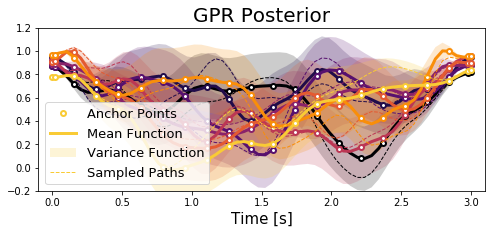

    [GRP-0] sumRwd:149.530=cntct:-0.46+ctrl:-38.64+fwd:16.67+hd:-8.05+srv:180.00) xD:[0.868] hD:[21.5]


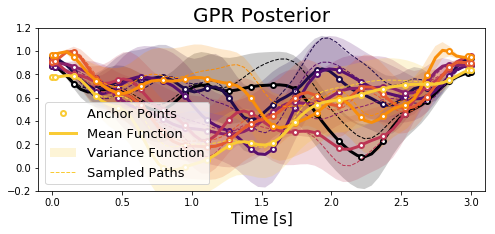

    [GRP-1] sumRwd:151.594=cntct:-0.48+ctrl:-37.08+fwd:16.99+hd:-7.84+srv:180.00) xD:[0.864] hD:[33.2]


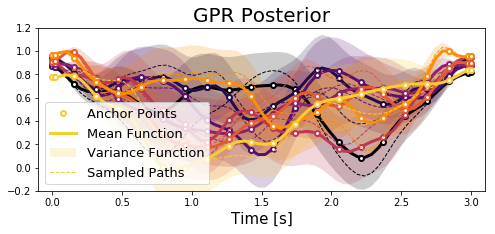

    [GRP-2] sumRwd:150.683=cntct:-0.51+ctrl:-37.32+fwd:13.23+hd:-4.71+srv:180.00) xD:[0.667] hD:[10.0]


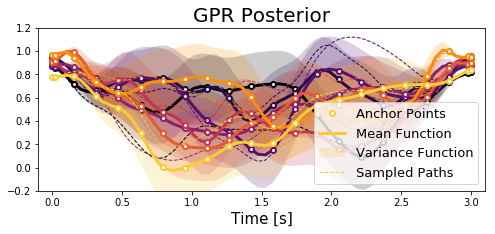

    [GRP-3] sumRwd:147.196=cntct:-0.52+ctrl:-37.89+fwd:7.36+hd:-1.76+srv:180.00) xD:[0.381] hD:[5.1]


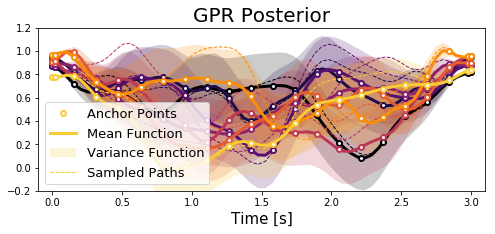

    [GRP-4] sumRwd:150.686=cntct:-0.49+ctrl:-37.89+fwd:14.95+hd:-5.89+srv:180.00) xD:[0.747] hD:[32.0]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0030.npz] Saved. Size is [1.4398]MB
[0000/100][0.0%] Loss: 4.61(recon:3.73+kl:-0.04+l2:0.00+ent:0.91)
[0010/100][10.0%] Loss: 3.02(recon:2.49+kl:-0.41+l2:0.00+ent:0.93)
[0020/100][20.0%] Loss: 3.00(recon:2.55+kl:-0.49+l2:0.00+ent:0.94)
[0030/100][30.0%] Loss: 3.03(recon:2.56+kl:-0.47+l2:0.00+ent:0.93)
[0040/100][40.0%] Loss: 2.75(recon:2.35+kl:-0.54+l2:0.00+ent:0.93)
[0050/100][50.0%] Loss: 2.38(recon:2.00+kl:-0.56+l2:0.00+ent:0.94)
[0060/100][60.0%] Loss: 2.75(recon:2.35+kl:-0.54+l2:0.00+ent:0.93)
[0070/100][70.0%] Loss: 2.67(recon:2.30+kl:-0.56+l2:0.00+ent:0.94)
[0080/100][80.0%] Loss: 2.95(recon:2.53+kl:-0.52+l2:0.00+ent:0.94)
[0090/100][90.0%] Loss: 3.11(recon:2.70+kl:-0.53+l2:0.00+ent:0.94)
[0099/100][99.0%] Loss: 2.92(recon:2.52+kl:-0.55+l2:0.00+ent:0.94)
[31/1000](#total:3200)

[Stat] Q:[70.609] xDispMean:[0.867] hSqMean:[12480.4]
[0000/100][0.0%] Loss: 3.33(recon:2.68+kl:-0.26+l2:0.00+ent:0.91)
[0010/100][10.0%] Loss: 2.51(recon:2.09+kl:-0.47+l2:0.00+ent:0.89)
[0020/100][20.0%] Loss: 2.51(recon:2.13+kl:-0.51+l2:0.00+ent:0.89)
[0030/100][30.0%] Loss: 2.48(recon:2.11+kl:-0.52+l2:0.00+ent:0.89)
[0040/100][40.0%] Loss: 2.75(recon:2.34+kl:-0.48+l2:0.00+ent:0.89)
[0050/100][50.0%] Loss: 2.57(recon:2.22+kl:-0.55+l2:0.00+ent:0.89)
[0060/100][60.0%] Loss: 1.97(recon:1.72+kl:-0.64+l2:0.00+ent:0.89)
[0070/100][70.0%] Loss: 2.46(recon:2.12+kl:-0.56+l2:0.00+ent:0.89)
[0080/100][80.0%] Loss: 2.61(recon:2.26+kl:-0.54+l2:0.00+ent:0.89)
[0090/100][90.0%] Loss: 2.57(recon:2.23+kl:-0.55+l2:0.00+ent:0.89)
[0099/100][99.0%] Loss: 2.54(recon:2.20+kl:-0.55+l2:0.00+ent:0.89)
[39/1000](#total:4000) avgQ:[-290.968] XdispMean:[0.347] XdispVar:[3.109] absHdispMean:[81.3] priorProb:[0.88]
 rSum:[-290.968] = (contact:-0.239+ctrl:-338.876+fwd:0.743+heading:-121.486+survive:168.890) [rSumM

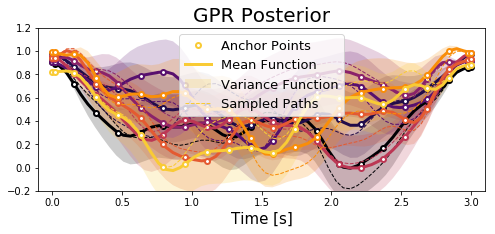

    [GRP-0] sumRwd:112.133=cntct:-0.54+ctrl:-48.16+fwd:0.68+hd:-19.85+srv:180.00) xD:[0.034] hD:[-48.0]


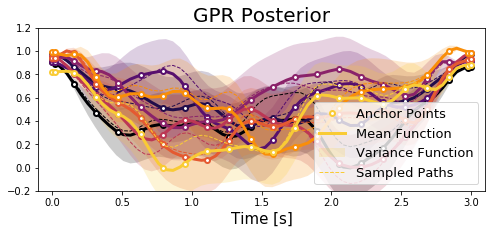

    [GRP-1] sumRwd:119.998=cntct:-0.56+ctrl:-48.17+fwd:1.78+hd:-13.05+srv:180.00) xD:[0.089] hD:[-45.3]


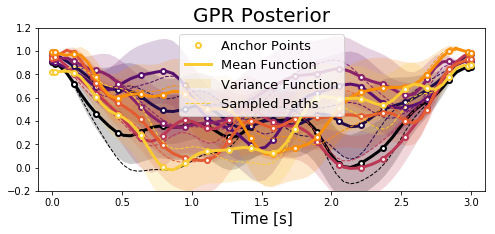

    [GRP-2] sumRwd:119.989=cntct:-0.56+ctrl:-48.23+fwd:-0.02+hd:-11.21+srv:180.00) xD:[-0.001] hD:[-44.1]


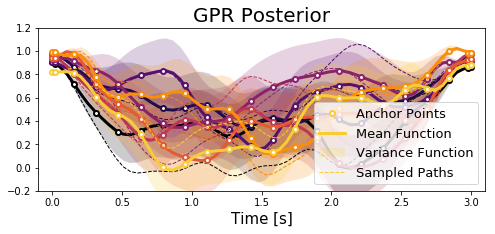

    [GRP-3] sumRwd:116.513=cntct:-0.55+ctrl:-47.91+fwd:-0.47+hd:-14.56+srv:180.00) xD:[-0.023] hD:[-47.6]


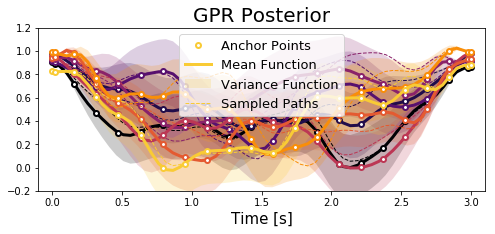

    [GRP-4] sumRwd:112.563=cntct:-0.54+ctrl:-48.91+fwd:-1.81+hd:-16.18+srv:180.00) xD:[-0.090] hD:[-61.5]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0040.npz] Saved. Size is [1.4343]MB
[0000/100][0.0%] Loss: 2.20(recon:1.70+kl:-0.41+l2:0.00+ent:0.90)
[0010/100][10.0%] Loss: 1.29(recon:1.06+kl:-0.63+l2:0.00+ent:0.86)
[0020/100][20.0%] Loss: 2.29(recon:1.98+kl:-0.54+l2:0.00+ent:0.85)
[0030/100][30.0%] Loss: 2.17(recon:1.90+kl:-0.58+l2:0.00+ent:0.85)
[0040/100][40.0%] Loss: 2.24(recon:1.96+kl:-0.56+l2:0.00+ent:0.84)
[0050/100][50.0%] Loss: 1.56(recon:1.37+kl:-0.65+l2:0.00+ent:0.85)
[0060/100][60.0%] Loss: 2.42(recon:2.16+kl:-0.58+l2:0.00+ent:0.85)
[0070/100][70.0%] Loss: 1.85(recon:1.62+kl:-0.63+l2:0.00+ent:0.85)
[0080/100][80.0%] Loss: 1.52(recon:1.31+kl:-0.64+l2:0.00+ent:0.85)
[0090/100][90.0%] Loss: 1.88(recon:1.66+kl:-0.63+l2:0.00+ent:0.85)
[0099/100][99.0%] Loss: 2.14(recon:1.87+kl:-0.58+l2:0.00+ent:0.85)
[41/1000](#total:42

[Stat] Q:[141.919] xDispMean:[0.994] hSqMean:[1160.3]
[0000/100][0.0%] Loss: 4.30(recon:3.56+kl:-0.10+l2:0.00+ent:0.84)
[0010/100][10.0%] Loss: 3.46(recon:2.99+kl:-0.38+l2:0.00+ent:0.85)
[0020/100][20.0%] Loss: 3.37(recon:2.98+kl:-0.46+l2:0.00+ent:0.85)
[0030/100][30.0%] Loss: 3.08(recon:2.70+kl:-0.47+l2:0.00+ent:0.85)
[0040/100][40.0%] Loss: 2.98(recon:2.63+kl:-0.51+l2:0.00+ent:0.86)
[0050/100][50.0%] Loss: 3.79(recon:3.40+kl:-0.47+l2:0.00+ent:0.86)
[0060/100][60.0%] Loss: 3.15(recon:2.82+kl:-0.54+l2:0.00+ent:0.86)
[0070/100][70.0%] Loss: 3.04(recon:2.70+kl:-0.52+l2:0.00+ent:0.86)
[0080/100][80.0%] Loss: 3.92(recon:3.51+kl:-0.46+l2:0.00+ent:0.87)
[0090/100][90.0%] Loss: 3.67(recon:3.27+kl:-0.47+l2:0.00+ent:0.86)
[0099/100][99.0%] Loss: 3.46(recon:3.11+kl:-0.52+l2:0.00+ent:0.87)
[49/1000](#total:5000) avgQ:[-271.985] XdispMean:[-0.151] XdispVar:[2.544] absHdispMean:[77.9] priorProb:[0.87]
 rSum:[-271.985] = (contact:-0.240+ctrl:-321.205+fwd:-8.344+heading:-104.206+survive:162.010) [rSu

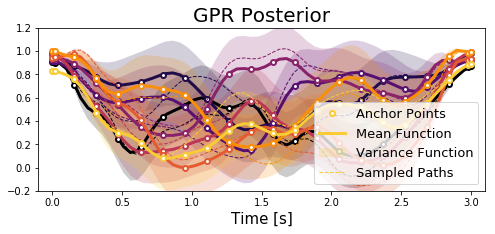

    [GRP-0] sumRwd:129.088=cntct:-0.51+ctrl:-50.11+fwd:5.06+hd:-5.35+srv:180.00) xD:[0.253] hD:[15.6]


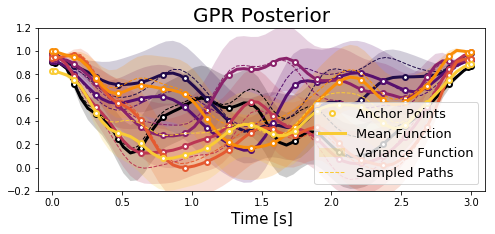

    [GRP-1] sumRwd:127.735=cntct:-0.51+ctrl:-50.56+fwd:2.59+hd:-3.79+srv:180.00) xD:[0.130] hD:[14.7]


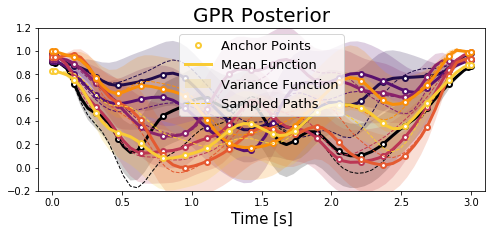

    [GRP-2] sumRwd:120.264=cntct:-0.49+ctrl:-50.14+fwd:3.05+hd:-12.15+srv:180.00) xD:[0.152] hD:[33.2]


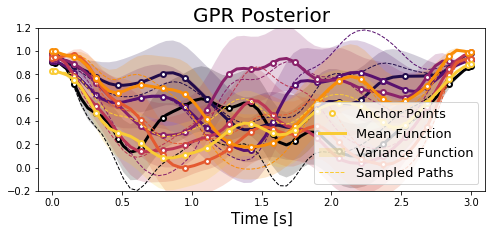

    [GRP-3] sumRwd:115.927=cntct:-0.49+ctrl:-49.33+fwd:9.04+hd:-23.29+srv:180.00) xD:[0.452] hD:[46.5]


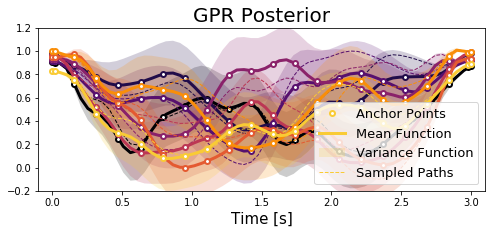

    [GRP-4] sumRwd:130.248=cntct:-0.51+ctrl:-50.51+fwd:5.01+hd:-3.74+srv:180.00) xD:[0.250] hD:[7.8]
[nets/ant_dlpg_headingCoef1e-04_tMax3_nAnchor20_entReg1e-02_nIter4update100_batchSize100/net_dlpg_epoch0050.npz] Saved. Size is [1.4306]MB
[0000/100][0.0%] Loss: 2.91(recon:2.32+kl:-0.30+l2:0.00+ent:0.89)
[0010/100][10.0%] Loss: 2.73(recon:2.32+kl:-0.46+l2:0.00+ent:0.87)
[0020/100][20.0%] Loss: 2.77(recon:2.43+kl:-0.53+l2:0.00+ent:0.86)
[0030/100][30.0%] Loss: 3.33(recon:2.96+kl:-0.49+l2:0.00+ent:0.87)
[0040/100][40.0%] Loss: 2.33(recon:2.05+kl:-0.59+l2:0.00+ent:0.87)
[0050/100][50.0%] Loss: 2.64(recon:2.35+kl:-0.58+l2:0.00+ent:0.87)
[0060/100][60.0%] Loss: 3.05(recon:2.70+kl:-0.51+l2:0.00+ent:0.86)
[0070/100][70.0%] Loss: 3.13(recon:2.75+kl:-0.49+l2:0.00+ent:0.87)
[0080/100][80.0%] Loss: 2.87(recon:2.52+kl:-0.52+l2:0.00+ent:0.87)
[0090/100][90.0%] Loss: 2.60(recon:2.32+kl:-0.59+l2:0.00+ent:0.87)
[0099/100][99.0%] Loss: 2.78(recon:2.49+kl:-0.58+l2:0.00+ent:0.87)
[51/1000](#total:5200) a

KeyboardInterrupt: 

In [4]:
SAVE_VID = True
MAKE_GIF = False # Probably unnecessary 
PLOT_GRP = True 
PLOT_EVERY = 10
SAVE_NET_EVERY = 10
sess = gpu_sess()
print ("Start training...")
AntEnv.train_dlpg(_sess=sess,_seed=0,_maxEpoch=maxEpoch,_batchSize=batchSize,_nIter4update=nIter4update,
                  _nPrevConsider=nPrevConsider,_nPrevBestQ2Add=nPrevBestQ2Add,
                  _SAVE_VID=SAVE_VID,_MAKE_GIF=MAKE_GIF,_PLOT_GRP=PLOT_GRP,_PLOT_EVERY=PLOT_EVERY,
                  _DO_RENDER=(SAVE_VID|MAKE_GIF),_SAVE_NET_EVERY=SAVE_NET_EVERY)